# Change in transport rate due to increased fluctuations 

Here we assume a normal distribution of dimensionless bed shear stress and look at the effect of changing the standard deviation of the distribution on the total calculated transport rate. The calculations are based on a MPM type of excess stress formulation for bedload transport,

$$ q = \alpha(\tau^*-\tau^*_{cr})^{3/2} $$

The key input parameter are:

- $\tau^*_{cr}$: the critical dimensinoless bed shear stress
- $\tau^*_{mean}$: the mean applied dimensionless bed shear stress
- $\sigma_\tau^*$: the standard deviation of the dimensionless stress for the base or first distribution, $\sigma_1 = \sigma_\tau^*$
- $n$: the multiplier on the standard deviation to represent increased turbulence in the second distribution, $\sigma_2 = n\sigma_\tau^*$

The results are expressed as a ratio of the total transport rate associated with the distribution with the larger standard deviation over the base case as a function of the multiper, $q_2/q_1 = q_2/q_1(n)$, where $q_1=q_1(\tau^*_{mean},\sigma_1)$ and $q_2=q_2(\tau^*_{mean},\sigma_2)$.

Note that the results are highly sensitive to $n$ when $\tau^*_{mean}$ is near or below the critical value. As it moves away from the critical value in the positive direction, the ratio of transport rates becomes a weaker function of $n$.

The cells below step through the basic idea in levels of increasing complexity. The main results is captured in the last cell block.

## Initial loads

In [1]:
import numpy as np
from numpy import log, sin, cos, exp, tan, pi
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display

## Create the distributions and calculate total transport rates using a single $n$ value

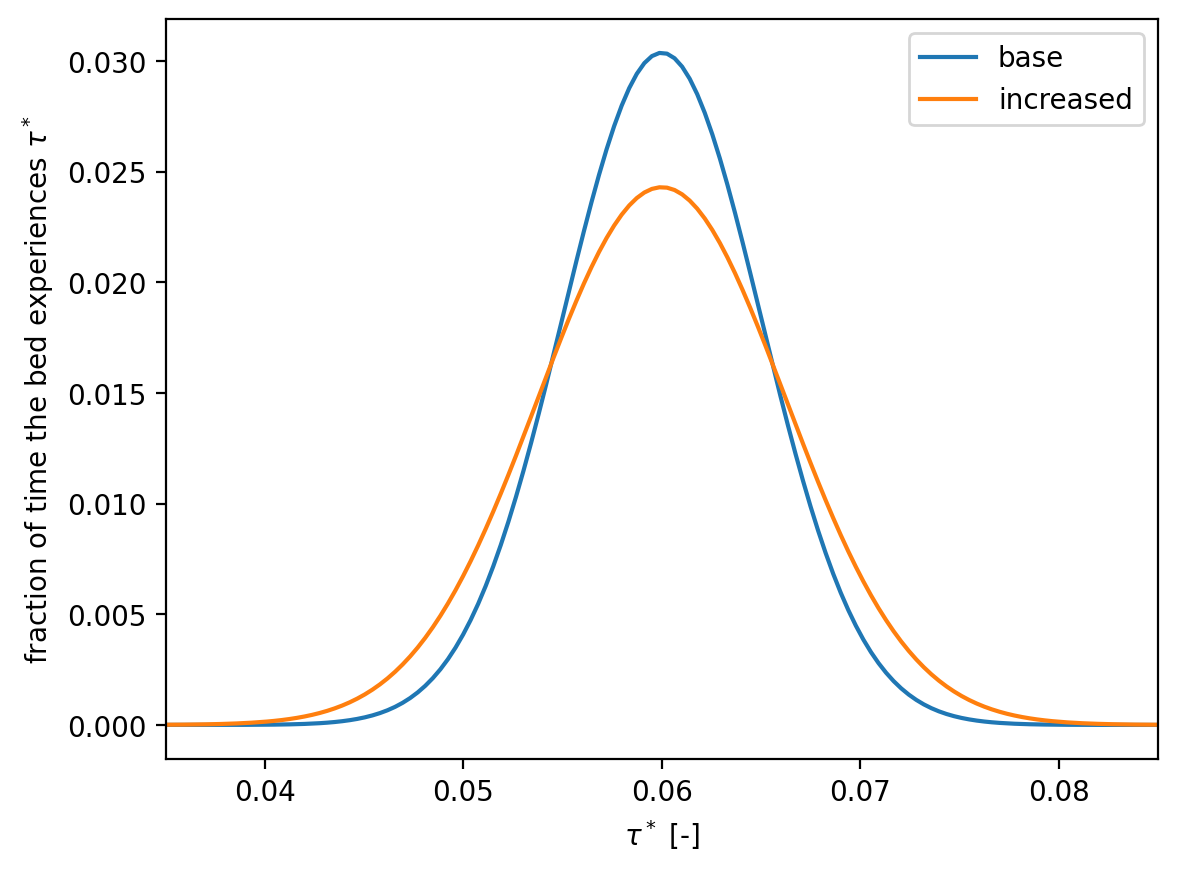

In [2]:
# set the critical stress and range of stress values
taucr = 0.06
stress = np.linspace(0.01,0.20,500)

# choose the mean and standard deviations for the distributions
mean1 = 0.06
mean2 = mean1
std1=0.005
n = 1.25
std2=n*std1

# calculate the distribution of stress values and the fraction of time things are at that value
tau_dist1 = (1/np.sqrt(2*pi*std1**2))*exp(-(stress - mean1)**2/(2*std1**2))
tau_dist2 = (1/np.sqrt(2*pi*std2**2))*exp(-(stress - mean2)**2/(2*std2**2))

tau_fi1 = tau_dist1/sum(tau_dist1)
tau_fi2 = tau_dist2/sum(tau_dist2)

fig, ax = plt.subplots()
ax.plot(stress,tau_fi1, label='base')
ax.plot(stress,tau_fi2, label='increased')
ax.set_xlim(mean1-4*std2,mean1+4*std2)
ax.set_xlabel(r'$\tau^*$ [-]')
ax.set_ylabel(r'fraction of time the bed experiences $\tau^*$' )
plt.legend();

Build the distributions to drive tansport. Only consider values above the threshold of motion.

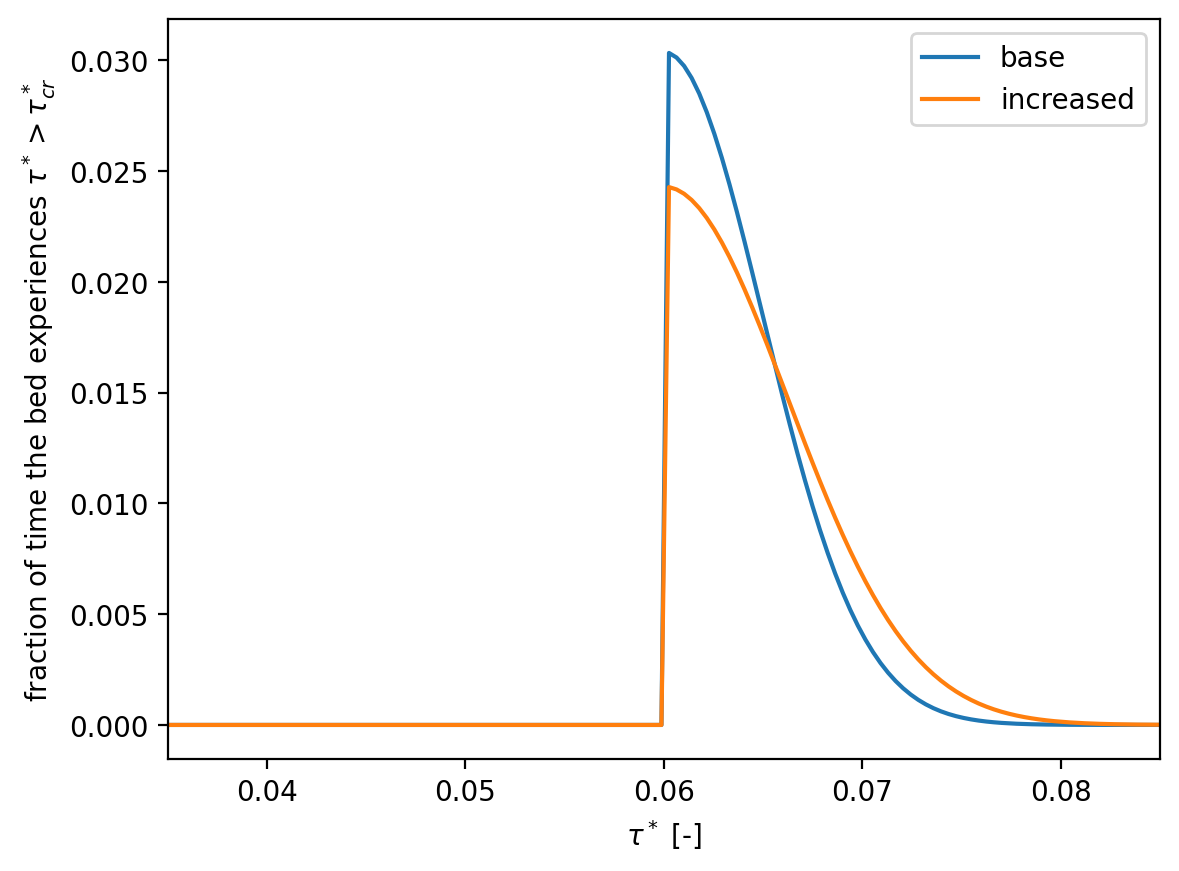

In [3]:
for i in range(0,len(tau_fi1)):
    if stress[i]<taucr:
        tau_fi1[i] = 0
        tau_fi2[i] = 0
    
fig, ax = plt.subplots()
ax.plot(stress,tau_fi1, label='base')
ax.plot(stress,tau_fi2, label='increased')
ax.set_xlim(mean1-4*std2,mean1+4*std2)
ax.set_xlabel(r'$\tau^*$ [-]')
ax.set_ylabel(r'fraction of time the bed experiences $\tau^*>\tau^*_{cr}$' )
plt.legend();

calculate the total transport rate as $q_i=q(\tau)f_i$ where $f_i$ is the fraction of the time that the stress is at the given value. Then sum all the $q_i$ values is the total transport rate for the given condtion.

In [4]:
q1 = tau_fi1*(stress-taucr)**3/2
q2 = tau_fi2*(stress-taucr)**3/2

# print('q1 from dist 1 (lower fluctuations) =',np.sum(q1))
# print('q2 from dist 2 (higher fluctuations) =',np.sum(q2))
print('factor of increased transport due to fluctuations, q2/q1 =', 
      np.around(np.sum(q2)/np.sum(q1),decimals=1), 'for a ', n,'factor increase in the standard deviation')

factor of increased transport due to fluctuations, q2/q1 = 2.0 for a  1.25 factor increase in the standard deviation


## Calculate $q_2/q_1=q_2/q_1(n)$ for a single $\tau^*_{mean}$ value

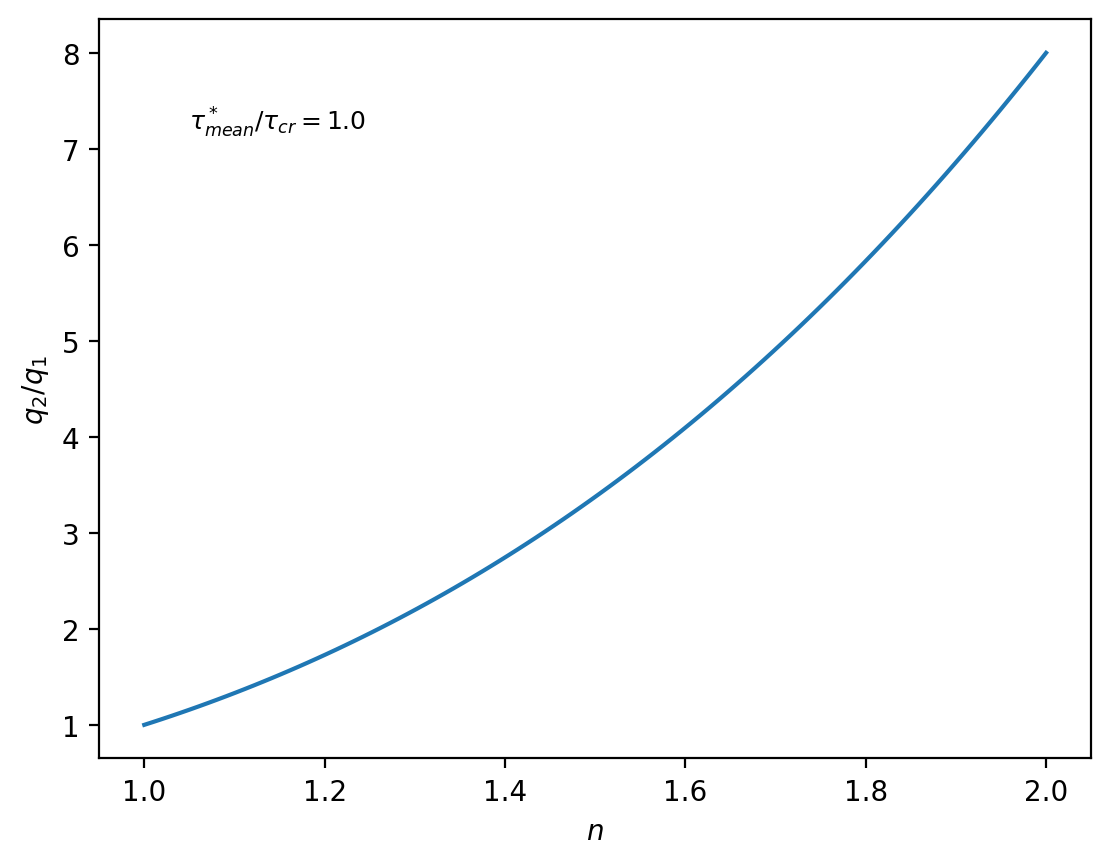

In [5]:
# User inputs ---------

# set the critical stress and range of stress values
taucr = 0.06
stress = np.linspace(0.01,0.20,500)

mean1 = 0.06 # the means dimensionless stress value of the base distribution
std1=0.005 # standard deviation of the base distributino
nmax = 2 # the max possible multipliers for the standard deviation of the second distribution 

# calculate the base transport rate -------------------

tau_dist1 = (1/np.sqrt(2*pi*std1**2))*exp(-(stress - mean1)**2/(2*std1**2))
tau_fi1 = tau_dist1/sum(tau_dist1)

for i in range(0,len(tau_fi1)):
    if stress[i]<taucr:
        tau_fi1[i] = 0
        
q1 = tau_fi1*(stress-taucr)**3/2
q1total = np.sum(q1)

# calculate the modified transport rate for each multiple of n and store the value --------------

mean2 = mean1 # mean of the second distribution (set equal to the first to look at fluctuations only)
n = np.linspace(1,nmax,100) 
std2=n*std1

q2_q1 = np.zeros(len(n)) # initialize an array to hold the results

for i in range(0,len(n)):
    
    tau_dist2 = (1/np.sqrt(2*pi*std2[i]**2))*exp(-(stress - mean2)**2/(2*std2[i]**2))
    tau_fi2 = tau_dist2/sum(tau_dist2)
    
    for j in range(0,len(tau_fi2)):
        if stress[j]<taucr:
            tau_fi2[j] = 0
            
    q2 = tau_fi2*(stress-taucr)**3/2    
    q2_q1[i] = np.sum(q2)/q1total

# plot the result -------------------------
ratio = np.around(mean1/taucr,decimals=2)
fig, ax = plt.subplots()
ax.plot(n,q2_q1)
ax.text(1.05,0.9*max(q2_q1),r'$\tau_{mean}^*/\tau_{cr}=$'+str(ratio),fontsize=9)
ax.set_xlabel('$n$')
ax.set_ylabel('$q_2/q_1$');

## Calculate $q_2/q_1=q_2/q_1(n)$ for a range of $\tau^*_{mean}$ values

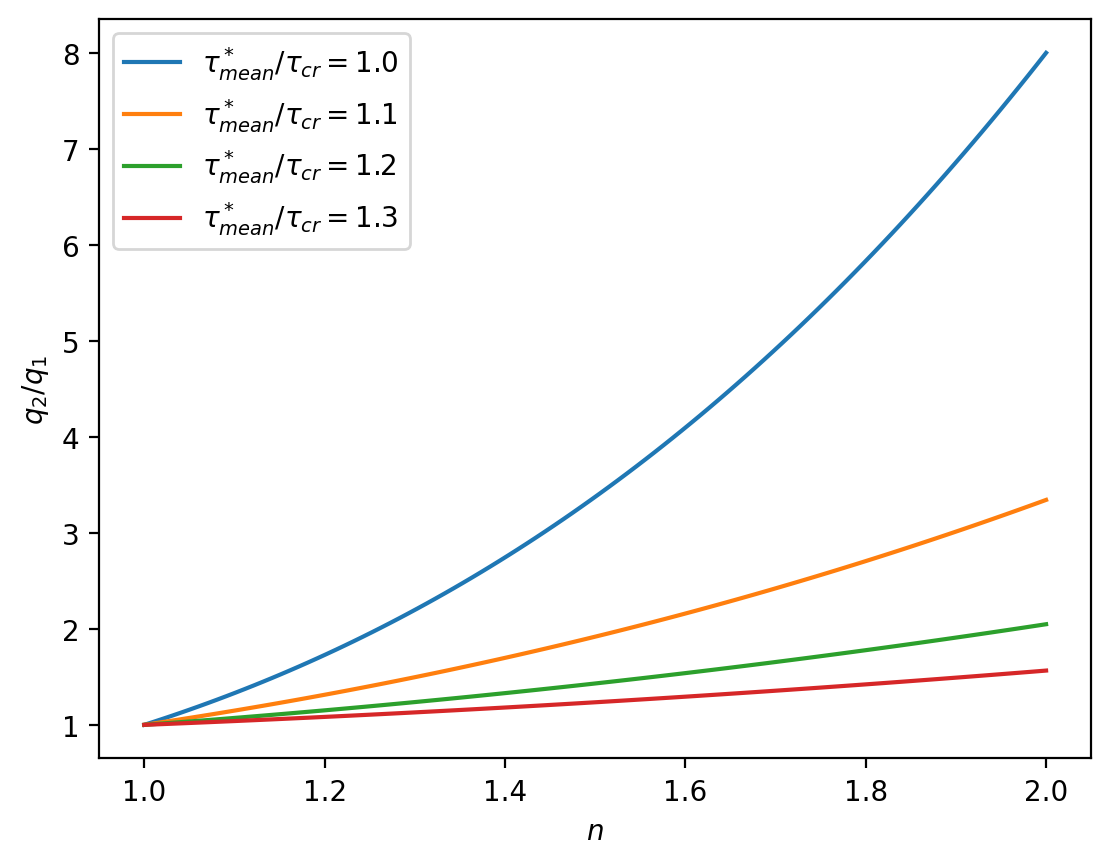

In [6]:
# User inputs ---------------------------------------

tau_ratio = np.array([1,1.1,1.2,1.3]) # the means dimensionless stress value of the base distribution
std1=0.005 # standard deviation of the base distributino
nmax = 2 # the max possible multipliers for the standard deviation of the second distribution 

# set the critical stress and range of stress values
taucr = 0.06
stress = np.linspace(0.01,0.20,500)

# define the mean value in relation to the critical 

mean1 = tau_ratio*taucr

# open up a figure to plot results to for each tau_ratio

fig, ax = plt.subplots()

for k in range(0,len(mean1)):

    # calculate the base transport rate -------------------

    tau_dist1 = (1/np.sqrt(2*pi*std1**2))*exp(-(stress - mean1[k])**2/(2*std1**2))
    tau_fi1 = tau_dist1/sum(tau_dist1)

    for i in range(0,len(tau_fi1)):
        if stress[i]<taucr:
            tau_fi1[i] = 0

    q1 = tau_fi1*(stress-taucr)**3/2
    q1total = np.sum(q1)

    # calculate the modified transport rate for each multiple of n and store the value --------------
    
    mean2 = mean1[k] # mean of the second distribution (set equal to the first to look at fluctuations only)
    n = np.linspace(1,nmax,100) 
    std2=n*std1

    q2_q1 = np.zeros(len(n)) # initialize an array to hold the results
    

    for i in range(0,len(n)):

        tau_dist2 = (1/np.sqrt(2*pi*std2[i]**2))*exp(-(stress - mean2)**2/(2*std2[i]**2))
        tau_fi2 = tau_dist2/sum(tau_dist2)

        for j in range(0,len(tau_fi2)):
            if stress[j]<taucr:
                tau_fi2[j] = 0

        q2 = tau_fi2*(stress-taucr)**3/2    
        q2_q1[i] = np.sum(q2)/q1total

    ax.plot(n,q2_q1,label=r'$\tau_{mean}^*/\tau_{cr}=$'+str(tau_ratio[k]))
    ax.set_xlabel('$n$')
    ax.set_ylabel('$q_2/q_1$')

plt.legend();